### Mega Case Study - Making a hybrid Deep Learning Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import warnings 
warnings.filterwarnings (action= 'ignore')
plt.style.use(['seaborn-bright' , 'dark_background'])

### Note :
1. SOMs retain topology of the input set
2. SOMs reveal correlation that are not easilt identified
3. SOMs classfiy data without supervision 
4. No target vector -> no back-propagation 
5. No lateral connections between outpot nodes (No neural netweok type of connection)

## Fraud Detection 

In [2]:
data = pd.read_csv('Credit_Card_Applications.csv')
X = data.iloc[: , :-1].values
Y = data.iloc[: , -1].values

### Feature Scaler

In [3]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0 , 1))
sc.fit_transform(X)

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

### Training the SOM

In [5]:
from minisom import MiniSom
som = MiniSom(x = 10 , y = 10 , input_len = 15  , sigma = 1 , learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 100)

* The neighbourhood radius is the sigma in the gaussian function.

### Visualising the Results

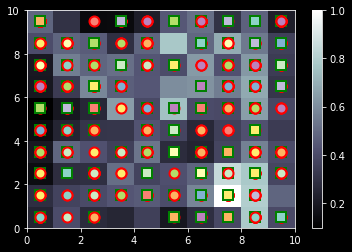

In [9]:
from pylab import bone , pcolor , colorbar , plot , show
bone()
pcolor(som.distance_map().T)
# .T takes the transpose of the map

colorbar()
markers = ['o' , 's']
colors = ['r' , 'g']

for i , x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5 , w[1] + 0.5 , markers[Y[i]],
    markeredgecolor = colors[Y[i]],
    markerfacecolor = None,
    markersize = 10,
    markeredgewidth = 2)
# We add 0.5 to put the maker at the centre

show()


### Finding the frauds

In [10]:
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,9)] , mappings[(3,3)]) , axis = 0)
frauds = sc.inverse_transform(frauds)

### Part 2 - Going from unsupervised to supervised

In [11]:
customers = data.iloc[: , 1:].values

### Creating the matrix of features

In [13]:
customers = data.iloc[: , 1: ].values 

### Creating the dependent variable

In [15]:
is_fraud = np.zeros(len(data))
for i in range(len(data)):
    if data.iloc[i , 0] in frauds:
        is_fraud[i] = 1

### Part 3 - ANN

### Feature Scaling 

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

In [17]:
from keras import models
ann = models.Sequential()

### Adding the input layer and the first hidden layer 

In [18]:
ann.add(layers.Dense(units = 2 , activation = 'relu'))

### Adding the output layer

In [19]:
ann.add(layers.Dense(units = 1 , activation = 'sigmoid'))

### Compiling the ANN

In [20]:
ann.compile(optimizer = 'adam' , loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [21]:
ann.fit(customers , is_fraud , batch_size = 1 , epochs = 10)

Epoch 1/10
690/690 [==============================] - 13s 2ms/step - loss: 0.3936 - accuracy: 0.9652
Epoch 2/10
690/690 [==============================] - 1s 1ms/step - loss: 0.1855 - accuracy: 1.0000
Epoch 3/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0657 - accuracy: 1.0000
Epoch 4/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0226 - accuracy: 1.0000
Epoch 5/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0110 - accuracy: 1.0000
Epoch 6/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 7/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 8/10
690/690 [==============================] - 1s 1ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 9/10
690/690 [==============================] - 1s 2ms/step - loss: 0.0010 - accuracy: 1.0000: 0s - loss: 0.0011 
Epoch 10/10
690/690 [==============================] - 1s 1ms/step - loss: 6.36

### Predicting test set results

In [22]:
y_pred = ann.predict(customers)
y_pred = np.concatenate((data.iloc[: , 0 :1].values , y_pred) , axis = 1)
y_pred = y_pred[y_pred[: , 1].argsort()]

In [23]:
print(y_pred)

[[1.56009750e+07 3.19089509e-07]
 [1.56214230e+07 4.83856638e-07]
 [1.56430560e+07 6.65005416e-07]
 ...
 [1.55924120e+07 9.10058618e-03]
 [1.56924080e+07 9.78532434e-03]
 [1.57440440e+07 1.68220103e-02]]
